# KAGGLE-HOTEL BOOKING DEMAND

La base de datos empleada para el análisis y modelado fue tomada del siguiente enlace https://www.kaggle.com/jessemostipak/hotel-booking-demand

## Introducción

Supongamos que fuimos contratados como consultores para responder esta pregunta clave: ¿cuándo un cliente cancelará o no llegará a su reservación?  
Esto puede ayudar a un hotel a planificar cosas como las necesidades personales y alimentarias. Quizás algunos hoteles también usan este modelo para ofrecer más habitaciones de las que tienen para ganar más dinero, o cosas por el estilo.  
El conjunto de datos del archivo hotel_bookings.csv contiene información de reserva para un hotel urbano y un hotel resort, e incluye información como cuándo se realizó la reserva, duración de la estadía, la cantidad de adultos, niños y / o bebés, y la cantidad de espacios de estacionamiento disponibles, entre otras cosas. Toda la información de identificación personal se ha eliminado de los datos.  
Ambos hoteles están ubicados en Portugal (H1 en la región turística de Algarve y H2 en la ciudad de Lisboa). La distancia entre estos dos lugares es de casi 280 km en carro y ambas localidades limitan con el atlántico norte.  
Antes de intentar hacer predicciones asegúrense de revisar los datos, que no existan datos faltantes, si hay ver si los eliminan o los imputan, revisar outliers, etc.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# colab
data = "/content/hotel_bookings.csv"
#data = "hotel_bookings.csv"
df = pd.read_csv(data)

In [ ]:
# Se revisan los datos
df.head(5)

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out               2015-07-01
1  Resort Hotel            0  ...           Check-Out               2015-07-01
2  Resort Hotel            0  ...           Check-Out               2015-07-02
3  Resort Hotel            0  ...           Check-Out               2015-07-02
4  Resort Hotel            0  ...           Check-Out               2015-07-03

[5 rows x 32 columns]

In [ ]:

df.iloc[0]

hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  342
arrival_date_year                         2015
arrival_date_month                        July
arrival_date_week_number                    27
arrival_date_day_of_month                    1
stays_in_weekend_nights                      0
stays_in_week_nights                         0
adults                                       2
children                                     0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                          Direct
distribution_channel                    Direct
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           C
assigned_room_type                           C
booking_chang

## 1. Exploratory Data Analysis:

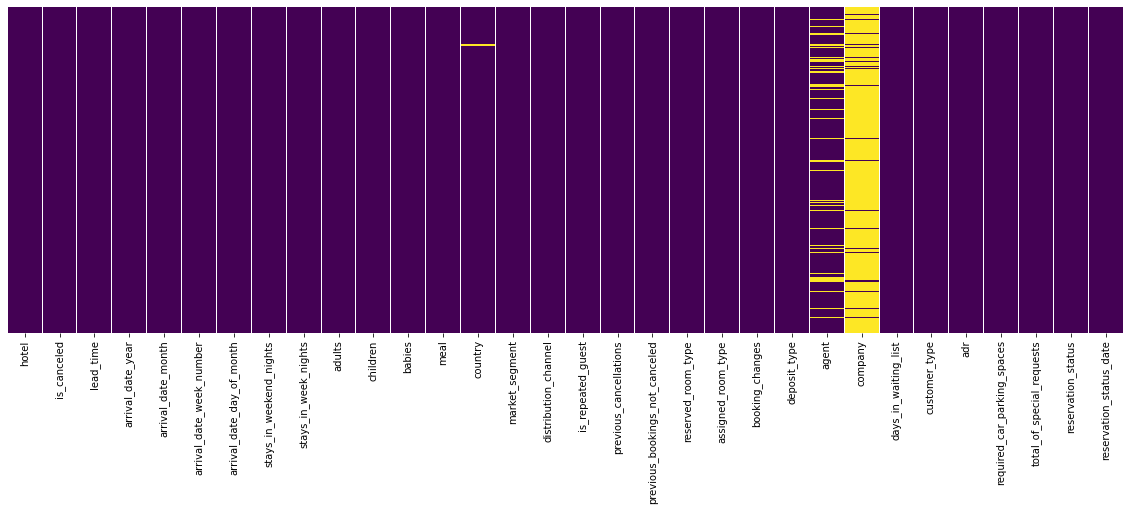

In [ ]:
# Revisamos si existen valores nulos
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Sí se han encontrado valores nulos en muchas observaciones, especialmente en la variable "company" y "agent"
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### IS CANCELED

In [ ]:
# Se revisa cuantas observaciones cancelaron la reservación
df["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [2]:
# Dividiremos el dataframe en 2 partes con los valores de la variable "is_canceled" y volvemos a revisar los valores nulos
df_not_canceled = df[df.is_canceled == 0]
df_canceled = df[df.is_canceled == 1]

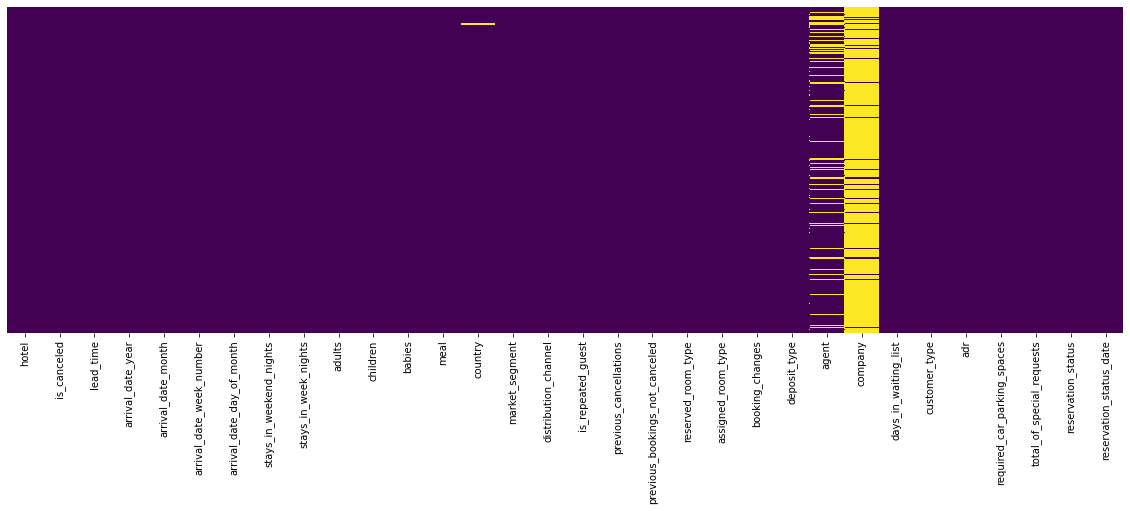

In [ ]:
# Caso no cancelada la reservación
plt.figure(figsize=(20, 6))
sns.heatmap(df_not_canceled.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_not_canceled.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             421
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12310
company                           69560


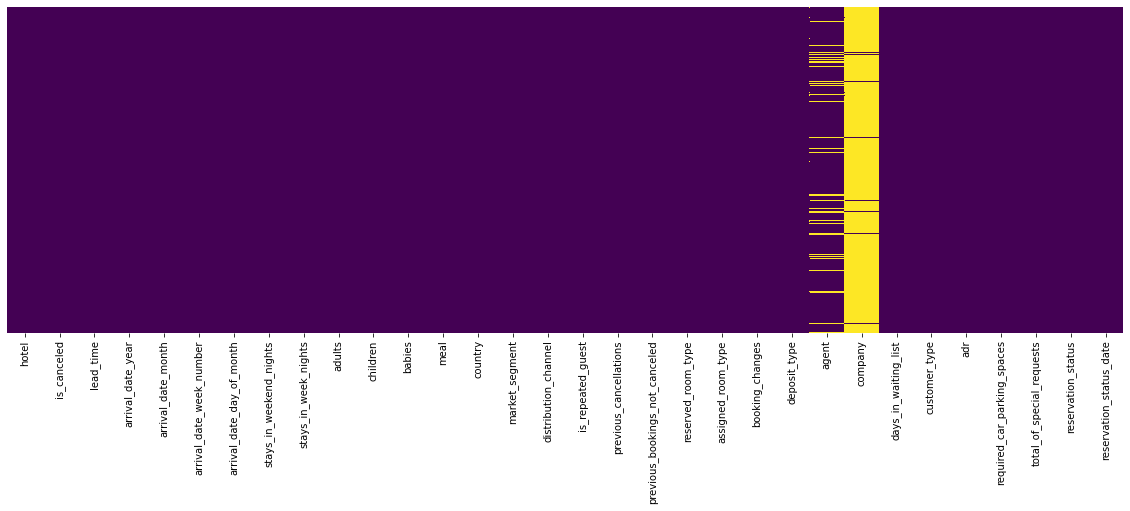

In [ ]:
# Caso reservación cancelada
plt.figure(figsize=(20, 6))
sns.heatmap(df_canceled.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_canceled.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              67
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4030
company                           43033


In [ ]:
# De las reservaciones no canceladas el 0.56% de las observaciones tienen valores nulos en la variable "country"
df_not_canceled["country"].isnull().sum()/df_not_canceled["is_canceled"].value_counts()

0    0.005601
Name: is_canceled, dtype: float64

In [ ]:
# De las reservaciones canceladas el 0.15% de las observaciones tienen valores nulos en la variable "country"
df_canceled["country"].isnull().sum()/df_canceled["is_canceled"].value_counts()

1    0.001515
Name: is_canceled, dtype: float64

In [ ]:
# De las reservaciones no canceladas el 16% de las observaciones tienen valores nulos en la variable "agent"
df_not_canceled["agent"].isnull().sum()/df_not_canceled["is_canceled"].value_counts()

0    0.163771
Name: is_canceled, dtype: float64

In [ ]:
# De las reservaciones canceladas el 9% de las observaciones tienen valores nulos en la variable "agent"
df_canceled["agent"].isnull().sum()/df_canceled["is_canceled"].value_counts()

1    0.091127
Name: is_canceled, dtype: float64

In [ ]:
# De las reservaciones no canceladas el 92% de las observaciones tienen valores nulos en la variable "company"
df_not_canceled["company"].isnull().sum()/df_not_canceled["is_canceled"].value_counts()

0    0.925418
Name: is_canceled, dtype: float64

In [ ]:
# De las reservaciones canceladas el 97% de las observaciones tienen valores nulos en la variable "company"
df_canceled["company"].isnull().sum()/df_canceled["is_canceled"].value_counts()

1    0.973069
Name: is_canceled, dtype: float64

In [ ]:
# De lo anterior se entiende que todos aquellos clientes que no usaron un agente o compañia turística para hacer la reservación, y que tienen
# el valor NULL, en realidad no están nulas las observaciones, y la información que nos puede dar es muy importante, ya que quiere decir, que estos
# clientes hicieron la reservación independientemente de agentes y compañias turísticas, lo cual puede influir en la cancelación de la reservación al no
# verse obligados a pagar por un servicio extra.

In [3]:
# Por lo anterior cambiaremos el valor de "NULL" por "not paid" en la variable "agent" y "company"
df_not_canceled["agent"].fillna("not paid",inplace=True)
df_canceled["agent"].fillna("not paid",inplace=True)
df_not_canceled["company"].fillna("not paid",inplace=True)
df_canceled["company"].fillna("not paid",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [4]:
# También se cambiaran los valores "NULL" en la variable "country" a "unknow"
df_not_canceled["country"].fillna("unknown",inplace=True)
df_canceled["country"].fillna("unknown",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [5]:
# Finalmente, quitamos los rows con "NULL" en la variable "children" de la tabla df_canceled 
df_canceled = df_canceled.dropna()

In [ ]:
df_not_canceled.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df_canceled.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### HOTEL

In [ ]:
# Existen más reservaciones en el hotel de ciudad que en el resort
# Se cancelaron más reservaciones en el hotel de ciudad que en el resort
pd.crosstab(df["hotel"],df["is_canceled"])

is_canceled       0      1
hotel                     
City Hotel    46228  33102
Resort Hotel  28938  11122

### HOTEL vs LEAD TIME

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["lead_time"])

lead_time      0     1     2    3    4    5    6    7    8    9   ...   468  \
hotel                                                             ...         
City Hotel    2836  1632  1003  903  920  811  743  641  586  469 ...    13   
Resort Hotel  3079  1507   853  731  619  548  500  518  329  304 ...    17   

lead_time     476  478  479  504  518  532  542  709  737  
hotel                                                      
City Hotel     15    2   20   21   22    0    0    0    0  
Resort Hotel    0    0    0    0    0    1   23    1    1  

[2 rows x 422 columns]

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["lead_time"])

lead_time     0    1    2    3    4    5    6    7    8    9   ...   580  587  \
hotel                                                          ...              
City Hotel    273  231  126  119  132  154  164  117  163  155 ...    17   17   
Resort Hotel  157   88   86   63   44   52   38   55   59   64 ...     0    0   

lead_time     594  601  605  608  615  622  626  629  
hotel                                                 
City Hotel     17   17   30   17   17   17   30   17  
Resort Hotel    0    0    0    0    0    0    0    0  

[2 rows x 465 columns]

### HOTEL vs ARRIVAL DATE YEAR

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["arrival_date_year"])

arrival_date_year  2015   2016   2017
hotel                                
City Hotel         7678  22733  15817
Resort Hotel       6176  13637   9125

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["arrival_date_year"])

arrival_date_year  2015   2016   2017
hotel                                
City Hotel         6000  15407  11691
Resort Hotel       2138   4930   4054

### HOTEL vs ARRIVAL DATE MONTH

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["arrival_date_month"])

arrival_date_month  April  August  December  February  January  July  June  \
hotel                                                                        
City Hotel           4015    5381      2392      3064     2254  4782  4366   
Resort Hotel         2550    3257      2017      2308     1868  3137  2038   

arrival_date_month  March   May  November  October  September  
hotel                                                          
City Hotel           4072  4579      2696     4337       4290  
Resort Hotel         2573  2535      1976     2577       2102

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["arrival_date_month"])

arrival_date_month  April  August  December  February  January  July  June  \
hotel                                                                        
City Hotel           3465    3598      1740      1901     1482  3306  3528   
Resort Hotel         1059    1637       631       795      325  1436  1007   

arrival_date_month  March   May  November  October  September  
hotel                                                          
City Hotel           2386  3653      1661     3268       3110  
Resort Hotel          763  1024       461      978       1006

### HOTEL vs ARRIVAL DATE WEEK NUMBER

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["arrival_date_week_number"])

arrival_date_week_number   1    2    3    4    5    6    7    8    9    10  \
hotel                                                                        
City Hotel                440  448  488  527  527  589  793  865  808  899   
Resort Hotel              254  375  496  454  435  534  632  558  585  513   

arrival_date_week_number ...    44   45   46   47   48   49   50   51   52  \
hotel                    ...                                                 
City Hotel               ...   979  646  595  703  713  602  540  330  412   
Resort Hotel             ...   548  534  390  606  416  515  368  357  429   

arrival_date_week_number   53  
hotel                          
City Hotel                692  
Resort Hotel              480  

[2 rows x 53 columns]

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["arrival_date_week_number"])

arrival_date_week_number   1    2    3    4    5    6    7    8    9    10  \
hotel                                                                        
City Hotel                264  313  278  441  359  237  412  632  514  523   
Resort Hotel               89   82   57   65   66  148  272  161  210  214   

arrival_date_week_number ...    44   45   46   47   48   49   50   51   52  \
hotel                    ...                                                 
City Hotel               ...   567  605  465  274  298  464  516  173  191   
Resort Hotel             ...   178  156  124  102   77  201   81   73  163   

arrival_date_week_number   53  
hotel                          
City Hotel                506  
Resort Hotel              138  

[2 rows x 53 columns]

### HOTEL vs ARRIVAL DATE DAY OF MONTH

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["arrival_date_day_of_month"])

arrival_date_day_of_month    1     2     3     4     5     6     7     8   \
hotel                                                                       
City Hotel                 1280  1648  1420  1470  1634  1657  1373  1388   
Resort Hotel                902  1022   890   942  1004   899   851   886   

arrival_date_day_of_month    9     10 ...     22    23    24    25    26  \
hotel                                 ...                                  
City Hotel                 1543  1505 ...   1346  1537  1578  1736  1587   
Resort Hotel               1003   884 ...    909   903   916   944   934   

arrival_date_day_of_month    27    28    29    30   31  
hotel                                                   
City Hotel                 1495  1532  1427  1265  817  
Resort Hotel                892   903   891  1125  631  

[2 rows x 31 columns]

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["arrival_date_day_of_month"])

arrival_date_day_of_month    1     2     3    4     5    6     7     8     9   \
hotel                                                                           
City Hotel                 1052  1019  1109  991  1221  984  1086  1288  1149   
Resort Hotel                392   366   435  360   456  293   355   359   401   

arrival_date_day_of_month   10 ...    22   23    24    25    26    27    28  \
hotel                          ...                                            
City Hotel                 885 ...   980  910  1045  1087  1161  1042  1138   
Resort Hotel               301 ...   361  266   454   393   465   373   373   

arrival_date_day_of_month   29    30   31  
hotel                                      
City Hotel                 939  1115  535  
Resort Hotel               323   348  225  

[2 rows x 31 columns]

### HOTEL vs STAYS IN WEEKEND NIGHTS

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["stays_in_weekend_nights"])

stays_in_weekend_nights     0      1      2    3     4   5   6   7   8   9   \
hotel                                                                         
City Hotel               21561  12877  11471  173   113  17   8   0   2   2   
Resort Hotel             10936   6742   9352  642  1144  19  58   5  24   2   

stays_in_weekend_nights  10  12  13  14  16  18  19  
hotel                                                
City Hotel                0   0   1   2   1   0   0  
Resort Hotel              5   4   2   0   1   1   1

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["stays_in_weekend_nights"])

stays_in_weekend_nights     0     1     2    3    4   5   6   7   8   9   10  \
hotel                                                                          
City Hotel               16254  8556  7861  150  184  27  32   6  22   4   2   
Resort Hotel              3245  2450  4623  294  414  16  55   8  12   3   0   

stays_in_weekend_nights  12  16  
hotel                            
City Hotel                0   0  
Resort Hotel              1   1

### HOTEL vs STAYS IN WEEK NIGHTS

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["stays_in_week_nights"])

stays_in_week_nights    0      1      2     3     4     5    6    7    8   \
hotel                                                                       
City Hotel            3483  13154  13777  9674  3671  1985  194   99   80   
Resort Hotel          2249   7325   5033  4079  2397  5231  723  607  356   

stays_in_week_nights   9  ...  26  30  32  33  34  35  40  41  42  50  
hotel                     ...                                          
City Hotel             28 ...   0   1   0   0   1   1   0   1   0   0  
Resort Hotel          108 ...   1   3   1   1   0   0   1   0   1   1  

[2 rows x 33 columns]

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["stays_in_week_nights"])

stays_in_week_nights    0     1      2     3     4     5    6    7    8   9   \
hotel                                                                          
City Hotel            1479  7934  12624  6697  2470  1280  185  102   80  45   
Resort Hotel           433  1897   2248  1808  1025  2580  397  221  140  50   

stays_in_week_nights ...  16  17  18  19  20  21  22  24  30  40  
hotel                ...                                          
City Hotel           ...   6   2   5   4   8   8   6   2   0   0  
Resort Hotel         ...   5   0   0  25   9   3   1   1   1   1  

[2 rows x 26 columns]

### HOTEL vs ADULTS

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["adults"])

adults          0      1      2     3   4
hotel                                    
City Hotel    283  10425  32499  2997  24
Resort Hotel   11   5928  21923  1054  22

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["adults"])

adults         0     1      2     3   4   5   6   10  20  26  27  40  50  55
hotel                                                                       
City Hotel    107  5454  25753  1777   7   0   0   0   0   0   0   0   0   0
Resort Hotel    2  1220   9502   373   9   2   1   1   2   5   2   1   1   1

### HOTEL vs CHILDREN

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["children"])

children        0.0   1.0   2.0  3.0
hotel                               
City Hotel    42934  2014  1236   44
Resort Hotel  26768  1280   875   15

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["children"])

children       0.0   1.0   2.0   3.0   10.0
hotel                                      
City Hotel    31286  1009   788    15     0
Resort Hotel   9808   558   753     2     1

### HOTEL vs BABIES

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["babies"])

babies           0    1   2   9   10
hotel                               
City Hotel    45923  297   6   1   1
Resort Hotel  28493  438   7   0   0

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["babies"])

babies            0    1  2
hotel                      
City Hotel    33034   64  0
Resort Hotel  11019  101  2

### HOTEL vs MEAL

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["meal"])

meal             BB   FB    HB    SC  Undefined
hotel                                          
City Hotel    35638    9  3980  6601          0
Resort Hotel  22162  311  5499    83        883

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["meal"])

meal             BB   FB    HB    SC  Undefined
hotel                                          
City Hotel    26663   35  2437  3963          0
Resort Hotel   7843  443  2547     3        286

### HOTEL vs MARKET SEGMENT

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["market_segment"])

market_segment  Aviation  Complementary  Corporate  Direct  Groups  \
hotel                                                                
City Hotel           185            478       2345    5037    4352   
Resort Hotel           0            168       1958    5635    3362   

market_segment  Offline TA/TO  Online TA  
hotel                                     
City Hotel               9574      24257  
Resort Hotel             6334      11481

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["market_segment"])

market_segment  Aviation  Complementary  Corporate  Direct  Groups  \
hotel                                                                
City Hotel            52             64        641    1055    9623   
Resort Hotel           0             33        351     878    2474   

market_segment  Offline TA/TO  Online TA  
hotel                                     
City Hotel               7173      14490  
Resort Hotel             1138       6248

### HOTEL vs DISTRIBUTION CHANNEL

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["distribution_channel"])

distribution_channel  Corporate  Direct  GDS  TA/TO  Undefined
hotel                                                         
City Hotel                 2622    5548  156  37902          0
Resort Hotel               2581    6540    0  19816          1

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["distribution_channel"])

distribution_channel  Corporate  Direct  GDS  TA/TO
hotel                                              
City Hotel                  786    1232   37  31043
Resort Hotel                688    1325    0   9109

### HOTEL vs IS REPEATED GUEST

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["is_repeated_guest"])

is_repeated_guest      0     1
hotel                         
City Hotel         44637  1591
Resort Hotel       27271  1667

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["is_repeated_guest"])

is_repeated_guest      0    1
hotel                        
City Hotel         32657  441
Resort Hotel       11011  111

### HOTEL vs PREVIOUS CANCELLATIONS

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["previous_cancellations"])

previous_cancellations     0    1   2   3   4   5   6   11  13
hotel                                                         
City Hotel              45857  191  59  44  21  15  15  25   1
Resort Hotel            28767  146  19   1   3   2   0   0   0

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["previous_cancellations"])

previous_cancellations     0     1   2   3   4   5   6   11  13  14  19  21  \
hotel                                                                         
City Hotel              28080  4964  13   7   4   1   7  10  11   0   0   1   
Resort Hotel            10198   750  25  13   3   1   0   0   0  14  19   0   

previous_cancellations  24  25  26  
hotel                               
City Hotel               0   0   0  
Resort Hotel            48  25  26

### HOTEL vs PREVIOUS BOOKINGS NOT CANCELED

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["previous_bookings_not_canceled"])

previous_bookings_not_canceled     0    1    2    3    4   5   6   7   8   9   \
hotel                                                                           
City Hotel                      44761  524  180  121   93  82  56  47  36  36   
Resort Hotel                    26985  939  368  195  124  88  56  36  31  24   

previous_bookings_not_canceled ...  63  64  65  66  67  68  69  70  71  72  
hotel                          ...                                          
City Hotel                     ...   1   1   1   1   1   1   1   1   1   1  
Resort Hotel                   ...   0   0   0   0   0   0   0   0   0   0  

[2 rows x 73 columns]

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["previous_bookings_not_canceled"])

previous_bookings_not_canceled     0   1   2   3   4   5   6   7   8   10 ...  \
hotel                                                                     ...   
City Hotel                      32977  45  12   8   9   8   3   4   1   5 ...   
Resort Hotel                    11043  34  20   9   3   3   0   1   2   2 ...   

previous_bookings_not_canceled  15  16  17  25  26  27  29  44  48  58  
hotel                                                                   
City Hotel                       2   1   1   8   1   1   1   1   1   1  
Resort Hotel                     0   0   0   0   0   1   0   0   0   0  

[2 rows x 24 columns]

### HOTEL vs RESERVED ROOM TYPE

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["reserved_room_type"])

reserved_room_type      A    B    C     D     E     F    G    H  L
hotel                                                             
City Hotel          35347  747    9  7621  1048  1091  365    0  0
Resort Hotel        17017    3  615  5478  3573   926  966  356  4

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["reserved_room_type"])

reserved_room_type      A    B    C     D     E    F    G    H  L   P
hotel                                                                
City Hotel          27248  364    5  4147   505  700  119    0  0  10
Resort Hotel         6382    0  303  1955  1409  180  644  245  2   2

### HOTEL vs ASSIGNED ROOM TYPE

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["assigned_room_type"])

assigned_room_type      A     B     C      D     E     F     G    H    I    K
hotel                                                                        
City Hotel          30106  1501   146  10710  1628  1299   571    0    0  267
Resort Hotel        10999   150  1783   8250  4210  1525  1202  461  358    0

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["assigned_room_type"])

assigned_room_type      A    B    C     D     E    F    G    H  I   K  L   P
hotel                                                                       
City Hotel          26901  499   15  4273   540  719  129    0  0  12  0  10
Resort Hotel         6047    9  431  2089  1428  208  651  251  5   0  1   2

### HOTEL vs BOOKING CHANGES

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["booking_changes"])

booking_changes     0     1     2    3    4   5   6   7   8   9  ...  11  12  \
hotel                                                            ...           
City Hotel       37639  6238  1713  380  154  34  21  18   7   3 ...   2   1   
Resort Hotel     22284  4656  1326  403  155  64  24  10   6   4 ...   0   1   

booking_changes  13  14  15  16  17  18  20  21  
hotel                                            
City Hotel        3   4   3   1   1   1   1   1  
Resort Hotel      2   0   0   0   1   0   0   0  

[2 rows x 21 columns]

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["booking_changes"])

booking_changes     0    1    2   3   4   5   6   7   8   9   10  14  16
hotel                                                                   
City Hotel       31419  994  531  87  40  12  10   1   2   1   0   1   0
Resort Hotel      9968  813  235  57  27   8   8   2   2   0   1   0   1

### HOTEL vs DEPOSIT TYPE

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["deposit_type"])

deposit_type  No Deposit  Non Refund  Refundable
hotel                                           
City Hotel         46198          24           6
Resort Hotel       28749          69         120

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["deposit_type"])

deposit_type  No Deposit  Non Refund  Refundable
hotel                                           
City Hotel         20240       12844          14
Resort Hotel        9450        1650          22

### HOTEL vs AGENT

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["agent"])

agent          1.0  2.0  3.0  4.0  5.0   6.0   7.0  8.0    9.0  10.0  \
hotel                                                                  
City Hotel    1907   33  541   16    0  1717  3065  848  18693   186   
Resort Hotel     4   95   24    0  181   548     0  239      4    10   

agent           ...     497.0  502.0  508.0  509.0  510.0  526.0  527.0  \
hotel           ...                                                       
City Hotel      ...         0      0      0      8      0      0      0   
Resort Hotel    ...         1     24      6      0      2      9     35   

agent         531.0  535.0  not paid  
hotel                                 
City Hotel        0      0      5522  
Resort Hotel     22      3      6788  

[2 rows x 315 columns]

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["agent"])

agent          1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0    9.0  10.0    ...     \
hotel                                                                 ...      
City Hotel    5230   27  767   31  102  966  474  388  13261    61    ...      
Resort Hotel    50    7    4    0   47   59    0   39      2     3    ...      

agent         481.0  483.0  484.0  492.0  493.0  495.0  509.0  526.0  531.0  \
hotel                                                                         
City Hotel        0      0      1      0      0      0      2      0      0   
Resort Hotel      1      1      0     28      5     50      0      1     46   

agent         not paid  
hotel                   
City Hotel        2607  
Resort Hotel      1421  

[2 rows x 218 columns]

### HOTEL vs COMPANY

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["company"])

company       6.0  8.0  9.0  10.0  11.0  12.0  14.0  16.0  18.0  20.0  \
hotel                                                                   
City Hotel      0    1   14     0     1     0     6     0     1     0   
Resort Hotel    1    0   20     1     0    14     2     5     0    39   

company         ...     520.0  521.0  523.0  525.0  528.0  530.0  534.0  \
hotel           ...                                                       
City Hotel      ...         0      0      0      0      0      0      0   
Resort Hotel    ...         1      6     19     15      2      4      2   

company       539.0  541.0  not paid  
hotel                                 
City Hotel        0      0     43323  
Resort Hotel      2      1     26237  

[2 rows x 332 columns]

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["company"])

company       9.0  14.0  20.0  31.0  34.0  37.0  38.0  39.0  40.0  43.0  \
hotel                                                                     
City Hotel      1     1     0     0     0    10    14     0    77    18   
Resort Hotel    2     0    11     4     1     0     0     1     0     0   

company         ...     486.0  498.0  504.0  513.0  515.0  521.0  530.0  \
hotel           ...                                                       
City Hotel      ...         0      0      0      0      0      0      0   
Resort Hotel    ...         1     16      2      2      1      1      1   

company       531.0  543.0  not paid  
hotel                                 
City Hotel        0      0     32314  
Resort Hotel      1      2     10715  

[2 rows x 150 columns]

### HOTEL vs DAYS IN WAITING LIST

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["days_in_waiting_list"])

days_in_waiting_list    0    1    2    4    5    6    7    8    9    10  ...   \
hotel                                                                    ...    
City Hotel            45127    5    2   14    2   12    1    0    2    1 ...    
Resort Hotel          28700    4    2    3    1    4    0    3    0    0 ...    

days_in_waiting_list  185  187  207  215  223  224  236  259  330  379  
hotel                                                                   
City Hotel              0   22   10    8   36    4   29   10   14    6  
Resort Hotel            2    0    0    0    0    0    0    0    0    0  

[2 rows x 98 columns]

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["days_in_waiting_list"])

days_in_waiting_list    0    1    2    3    4    5    7    8    9    10  ...   \
hotel                                                                    ...    
City Hotel            30756    2    1   59    8    3    3    4   14   27 ...    
Resort Hotel          11105    1    0    0    0    2    0    0    0    0 ...    

days_in_waiting_list  187  193  207  215  223  224  236  330  379  391  
hotel                                                                   
City Hotel             23    1    5   13   25    6    6    1    9   45  
Resort Hotel            0    0    0    0    0    0    0    0    0    0  

[2 rows x 105 columns]

### HOTEL vs CUSTOMER TYPE

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["customer_type"])

customer_type  Contract  Group  Transient  Transient-Party
hotel                                                     
City Hotel         1195    264      32306            12463
Resort Hotel       1619    254      20793             6272

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["customer_type"])

customer_type  Contract  Group  Transient  Transient-Party
hotel                                                     
City Hotel         1105     29      27098             4866
Resort Hotel        157     30       9416             1519

### HOTEL vs REQUIRED CAR PARKING SPACES

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["required_car_parking_spaces"])

required_car_parking_spaces      0     1   2  3  8
hotel                                             
City Hotel                   44302  1921   3  2  0
Resort Hotel                 23448  5462  25  1  2

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["required_car_parking_spaces"])

required_car_parking_spaces      0
hotel                             
City Hotel                   33098
Resort Hotel                 11122

### HOTEL vs TOTAL OF SPECIAL REQUESTS

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["total_of_special_requests"])

total_of_special_requests      0      1     2     3    4   5
hotel                                                       
City Hotel                 21617  16699  6403  1307  177  25
Resort Hotel               15145   9209  3700   744  127  13

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["total_of_special_requests"])

total_of_special_requests      0     1     2    3   4  5
hotel                                                   
City Hotel                 26340  4718  1738  280  21  1
Resort Hotel                7216  2597  1127  166  15  1

### HOTEL vs RESERVATION STATUS

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["reservation_status"])

reservation_status  Check-Out
hotel                        
City Hotel              46228
Resort Hotel            28938

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["reservation_status"])

reservation_status  Canceled  No-Show
hotel                                
City Hotel             32182      916
Resort Hotel           10831      291

### COUNTRY

In [ ]:
# Reservaciones no canceladas
df_not_canceled["country"].value_counts()

PRT        21071
GBR         9676
FRA         8481
ESP         6391
DEU         6069
IRL         2543
ITA         2433
BEL         1868
NLD         1717
USA         1596
BRA         1394
CHE         1302
AUT         1033
CN          1025
SWE          797
POL          704
CHN          537
ISR          500
NOR          426
unknown      421
RUS          393
FIN          378
ROU          366
DNK          326
AUS          319
LUX          178
JPN          169
ARG          160
AGO          157
HUN          153
           ...  
ZMB            1
AIA            1
MLI            1
PLW            1
NCL            1
NAM            1
ASM            1
SYC            1
FRO            1
CYM            1
MDG            1
DMA            1
SLE            1
BHR            1
MAC            1
PYF            1
BFA            1
MRT            1
DJI            1
BHS            1
KIR            1
LCA            1
NPL            1
BWA            1
TJK            1
GUY            1
SMR            1
BDI           

In [ ]:
df_not_canceled["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'JAM', 'HRV', 'IRN', 'CAF', 'CYP', 'NZL',
       'IDN', 'KAZ', 'THA', 'COL', 'DOM', 'MKD', 'MYS', 'NGA', 'VEN',
       'GIB', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'PHL', 'SGP', 'BDI',
       'URY', 'SAU', 'KWT', 'LBN', 'AND', 'VNM', 'AZE', 'PLW', 'ARE',
       'QAT', 'EGY', 'PER', 'SVK', 'MDV', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'PAK', 'MAC', 'TGO', 'TWN', 'HKG',
       'DJI', 'GEO', 'TUN', 'STP', 'SEN', 'KNA', 'ETH', 'IRQ', 'RWA',
       'LIE', 'MM

In [8]:
# Se cambia el valor de CN por CHN que es el código correcto de China
df_not_canceled["country"] = df_not_canceled["country"].replace(["CN"],"CHN")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_not_canceled["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CHN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'JAM', 'HRV', 'IRN', 'CAF', 'CYP', 'NZL', 'IDN',
       'KAZ', 'THA', 'COL', 'DOM', 'MKD', 'MYS', 'NGA', 'VEN', 'GIB',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'PHL', 'SGP', 'BDI', 'URY',
       'SAU', 'KWT', 'LBN', 'AND', 'VNM', 'AZE', 'PLW', 'ARE', 'QAT',
       'EGY', 'PER', 'SVK', 'MDV', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'PAK', 'MAC', 'TGO', 'TWN', 'HKG', 'DJI',
       'GEO', 'TUN', 'STP', 'SEN', 'KNA', 'ETH', 'IRQ', 'RWA', 'LIE',
       'MMR', 'P

In [9]:
len(df_not_canceled["country"].unique())-1

164

In [ ]:
# Reservaciones canceladas
df_canceled["country"].value_counts()

PRT        27519
GBR         2453
ESP         2177
FRA         1934
ITA         1333
DEU         1218
IRL          832
BRA          830
USA          501
BEL          474
CHN          462
CHE          428
NLD          387
CN           254
RUS          239
AUT          230
SWE          227
POL          215
AGO          205
NOR          181
ISR          169
ROU          134
LUX          109
DNK          109
MAR          109
AUS          107
TUR          102
HUN           77
FIN           69
unknown       67
           ...  
MKD            2
ARM            2
IMN            2
MNE            2
KHM            2
GAB            2
MYT            2
GHA            2
GLP            2
UZB            2
ZWE            2
VNM            2
ALB            2
PRI            2
KEN            2
CIV            2
GNB            1
ETH            1
SYC            1
FJI            1
TMP            1
ZMB            1
CRI            1
NIC            1
MUS            1
VGB            1
LIE            1
UMI           

In [ ]:
df_canceled["country"].unique()

array(['PRT', 'IRL', 'ESP', 'DEU', 'CN', 'ITA', 'unknown', 'GBR', 'FRA',
       'ARE', 'BRA', 'NLD', 'FIN', 'CHE', 'TUN', 'BEL', 'USA', 'ARG',
       'NOR', 'CHN', 'POL', 'DNK', 'ALB', 'RUS', 'SWE', 'AUT', 'HKG',
       'IND', 'CZE', 'LUX', 'GEO', 'DZA', 'MAR', 'AND', 'ROU', 'TUR',
       'MOZ', 'ZAF', 'GIB', 'AUS', 'URY', 'BLR', 'JEY', 'CYP', 'EST',
       'ISR', 'GRC', 'LVA', 'COL', 'GGY', 'KWT', 'NGA', 'KOR', 'CHL',
       'HUN', 'HRV', 'MDV', 'VEN', 'SVK', 'AGO', 'FJI', 'KAZ', 'PAK',
       'IDN', 'SVN', 'LBN', 'PHL', 'LTU', 'SEN', 'SYC', 'AZE', 'BHR',
       'IRN', 'SAU', 'UKR', 'ECU', 'OMN', 'CPV', 'THA', 'TWN', 'HND',
       'SRB', 'JPN', 'SGP', 'MEX', 'ZMB', 'QAT', 'NZL', 'KHM', 'MCO',
       'BGD', 'UZB', 'BGR', 'IMN', 'TJK', 'ARM', 'PER', 'NIC', 'ISL',
       'BEN', 'MAC', 'VGB', 'MUS', 'MLT', 'EGY', 'CRI', 'TZA', 'JOR',
       'MYS', 'GAB', 'MKD', 'BIH', 'VNM', 'GHA', 'TMP', 'GLP', 'KEN',
       'PRI', 'DOM', 'LIE', 'GNB', 'ETH', 'MNE', 'UMI', 'MYT', 'FRO',
       'CIV', 'ZW

In [10]:
# Se cambia el valor de CN por CHN que es el código correcto de China
df_canceled["country"] = df_canceled["country"].replace(["CN"],"CHN")

In [ ]:
df_canceled["country"].unique()

array(['PRT', 'IRL', 'ESP', 'DEU', 'CHN', 'ITA', 'unknown', 'GBR', 'FRA',
       'ARE', 'BRA', 'NLD', 'FIN', 'CHE', 'TUN', 'BEL', 'USA', 'ARG',
       'NOR', 'POL', 'DNK', 'ALB', 'RUS', 'SWE', 'AUT', 'HKG', 'IND',
       'CZE', 'LUX', 'GEO', 'DZA', 'MAR', 'AND', 'ROU', 'TUR', 'MOZ',
       'ZAF', 'GIB', 'AUS', 'URY', 'BLR', 'JEY', 'CYP', 'EST', 'ISR',
       'GRC', 'LVA', 'COL', 'GGY', 'KWT', 'NGA', 'KOR', 'CHL', 'HUN',
       'HRV', 'MDV', 'VEN', 'SVK', 'AGO', 'FJI', 'KAZ', 'PAK', 'IDN',
       'SVN', 'LBN', 'PHL', 'LTU', 'SEN', 'SYC', 'AZE', 'BHR', 'IRN',
       'SAU', 'UKR', 'ECU', 'OMN', 'CPV', 'THA', 'TWN', 'HND', 'SRB',
       'JPN', 'SGP', 'MEX', 'ZMB', 'QAT', 'NZL', 'KHM', 'MCO', 'BGD',
       'UZB', 'BGR', 'IMN', 'TJK', 'ARM', 'PER', 'NIC', 'ISL', 'BEN',
       'MAC', 'VGB', 'MUS', 'MLT', 'EGY', 'CRI', 'TZA', 'JOR', 'MYS',
       'GAB', 'MKD', 'BIH', 'VNM', 'GHA', 'TMP', 'GLP', 'KEN', 'PRI',
       'DOM', 'LIE', 'GNB', 'ETH', 'MNE', 'UMI', 'MYT', 'FRO', 'CIV',
       'ZWE'], d

In [11]:
len(df_canceled["country"].unique())-1

126

### ADR

In [12]:
# Reservaciones no canceladas
df_not_canceled["adr"].describe()

count    75166.000000
mean        99.987693
std         49.206263
min         -6.380000
25%         67.500000
50%         92.500000
75%        125.000000
max        510.000000
Name: adr, dtype: float64

In [13]:
# Revisamos la observacion con valor negativo
df_not_canceled.query(("adr==-6.38"))

hotel  is_canceled  ...  reservation_status  reservation_status_date
14969  Resort Hotel            0  ...           Check-Out               2017-03-15

[1 rows x 32 columns]

In [14]:
# Borramos la observación
df_not_canceled = df_not_canceled.loc[df_not_canceled["adr"] != -6.38]

In [15]:
df_not_canceled["adr"].describe()

count    75165.000000
mean        99.989108
std         49.205061
min          0.000000
25%         67.500000
50%         92.500000
75%        125.000000
max        510.000000
Name: adr, dtype: float64

In [ ]:
# Reservaciones canceladas
df_canceled["adr"].describe()

count    44224.000000
mean       104.964333
std         52.571142
min          0.000000
25%         72.415000
50%         96.200000
75%        127.620000
max       5400.000000
Name: adr, dtype: float64

In [16]:
# Revisamos la observación con el valor máximo
df_canceled.query('(adr==5400)')

hotel  is_canceled  ...  reservation_status  reservation_status_date
48515  City Hotel            1  ...            Canceled               2016-02-19

[1 rows x 32 columns]

In [17]:
# Quitamos la observación con el valor de 5400 en la variable "adr"
df_canceled = df_canceled.loc[df_canceled["adr"] != 5400]

In [18]:
df_not_canceled.shape

(75165, 32)

In [19]:
df_canceled.shape

(44219, 32)

### BOX-PLOT

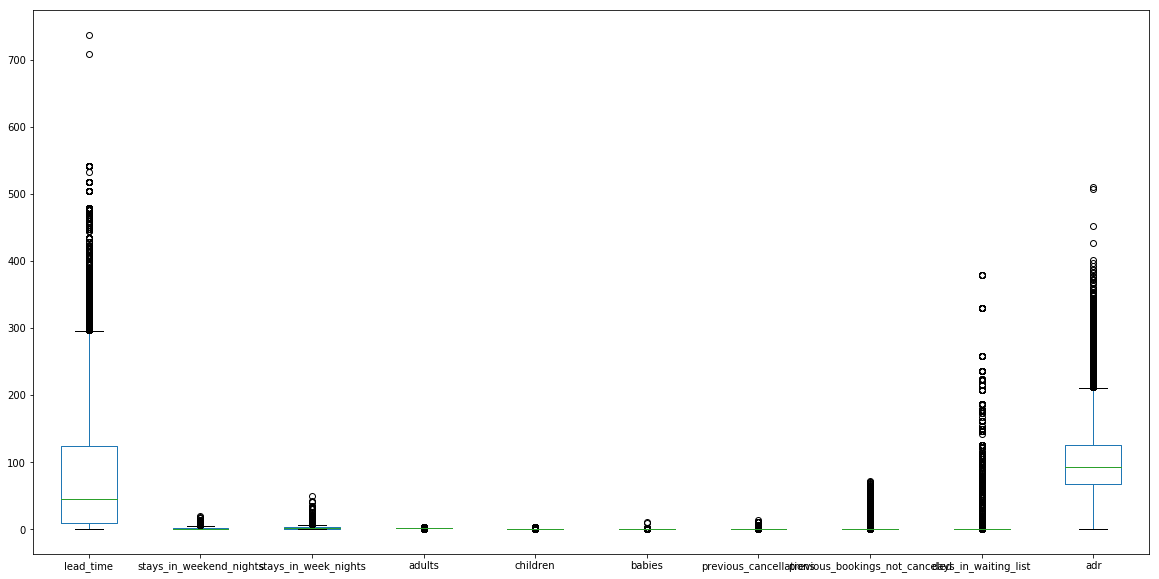

In [ ]:
# Reservaciones no canceladaas
col = ["lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","previous_cancellations",
      "previous_bookings_not_canceled","days_in_waiting_list","adr"]
df_n_c = df_not_canceled.filter(items=col)
df_n_c.plot.box(figsize=(20,10));

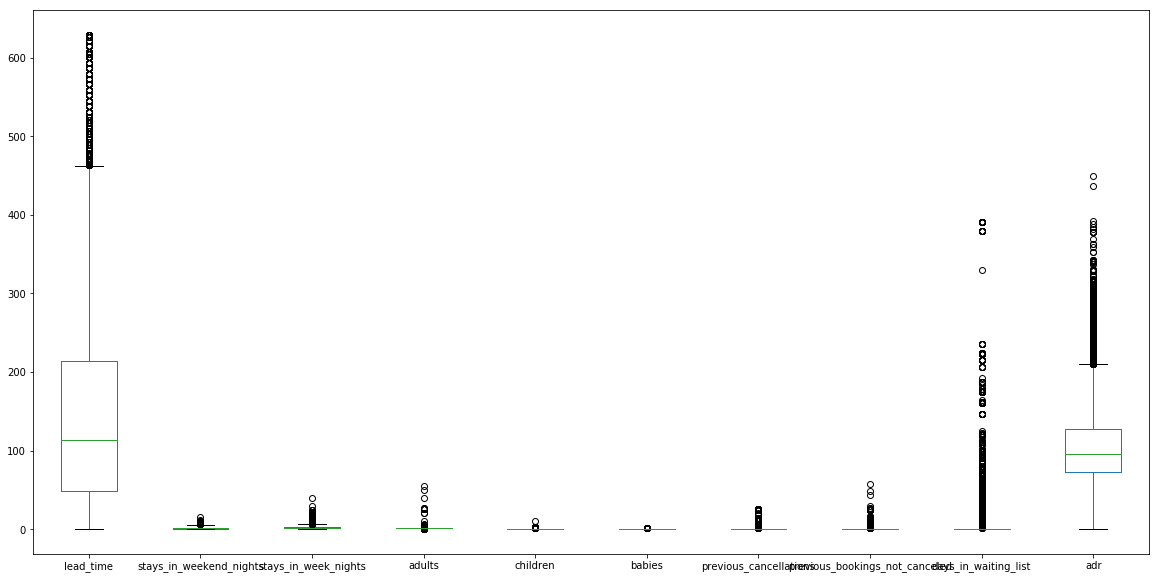

In [ ]:
# Reservaciones canceladaas
col = ["lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","previous_cancellations",
      "previous_bookings_not_canceled","days_in_waiting_list","adr"]
df_c = df_canceled.filter(items=col)
df_c.plot.box(figsize=(20,10))

### UNIÓN DE DATAFRAMES

In [20]:
df_f = df_not_canceled.merge(df_canceled,how="outer")

In [21]:
df_f["is_canceled"].isnull().value_counts()

False    119384
Name: is_canceled, dtype: int64

### a. ¿De dónde vienen los huéspedes?

Los clientes que no cancelaron su reservación vienen de 164 paises diferentes,
en la siguiente tabla podemos observar los 10 paises con mayor número de reservaciones.
- Portugal,Gran Bretaña,Francia,España,Alemania,Irlanda,Italia,Belgica,Paises Bajos,Estados Unidos.

In [ ]:
df_not_canceled["country"].value_counts().head(10)

PRT    21071
GBR     9675
FRA     8481
ESP     6391
DEU     6069
IRL     2543
ITA     2433
BEL     1868
NLD     1717
USA     1596
Name: country, dtype: int64

De los clientes que cancelaron su reservación encontramos algunos paises diferentes de la distribución de los paises con el mayor número de no cancelaciones.
Brasil y China son los paises diferentes de la tabla anterior.

In [ ]:
df_canceled["country"].value_counts().head(10)

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
CHN      716
USA      501
Name: country, dtype: int64

### b. ¿Cuánto pagan los huéspedes por una habitación por noche en promedio?

El promedio por noche del dataframe completo es de 101.79 dolares

In [ ]:
df_f["adr"].describe()

count    119384.000000
mean        101.790068
std          48.151476
min           0.000000
25%          69.290000
50%          94.590000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

El promedio por noche de los clientes que no cancelaron su reservacion es de 99.99 dolares

In [ ]:
df_not_canceled["adr"].describe()

count    75165.000000
mean        99.989108
std         49.205061
min          0.000000
25%         67.500000
50%         92.500000
75%        125.000000
max        510.000000
Name: adr, dtype: float64

El promedio por noche de los clientes que cancelaron su reservacion es de 104.85 dolares

In [ ]:
df_canceled["adr"].describe()

count    44219.000000
mean       104.851403
std         46.145122
min          0.000000
25%         72.450000
50%         96.210000
75%        127.620000
max        450.000000
Name: adr, dtype: float64

### c. ¿Cómo varía el precio por noche durante el año?

El precio varia según el año y el hotel, para el "City hotel" el mes con el valor más elevado es Agosto con 139.42 dolares en el año 2017,para "Resort hotel" el mes con el costo más elevado es Agosto con 207.35 dolares en el año 2017.

In [ ]:
pd.pivot_table(df_f, values="adr", index=["arrival_date_year","hotel"],
                    columns=["arrival_date_month"], aggfunc=np.mean)

arrival_date_month                   April      August   December   February  \
arrival_date_year hotel                                                        
2015              City Hotel           NaN   77.806910  81.108162        NaN   
                  Resort Hotel         NaN  155.546984  64.896122        NaN   
2016              City Hotel     99.549705  118.917943  93.977966  79.976782   
                  Resort Hotel   68.642421  190.958730  72.729197  54.699329   
2017              City Hotel    121.884983  139.424419        NaN  89.760351   
                  Resort Hotel   87.717239  207.345506        NaN  55.625723   

arrival_date_month                January        July        June      March  \
arrival_date_year hotel                                                        
2015              City Hotel          NaN   69.819170         NaN        NaN   
                  Resort Hotel        NaN  126.256067         NaN        NaN   
2016              City Hotel    76.327383  111.690699  108.887571  90.157422   
                  Resort Hotel  46.931154  155.455739  101.503294  57.087222   
2017              City Hotel    86.252673  125.964645  129.137978  93.305947   
                  Resort Hotel  51.170947  177.680445  117.748359  58.055562   

arrival_date_month                     May   November     October   September  
arrival_date_year hotel                                                        
2015              City Hotel           NaN  73.541862   89.393113  101.064472  
                  Resort Hotel         NaN  46.093747   56.269605   80.912379  
2016              City Hotel    108.639984  93.816480  108.466694  118.154991  
                  Resort Hotel   71.428807  50.082680   66.712440  106.094018  
2017              City Hotel    132.126438        NaN         NaN         NaN  
                  Resort Hotel   86.275179        NaN         NaN         NaN

Para el caso de las reservaciones que no se cancelaron los datos son los siguientes:
"City hotel" el mes con el valor más elevado es Agosto con 137.59 dolares en el año 2017,para "Resort hotel" el mes con el costo más elevado es Agosto con 201.68 dolares en el año 2017.

In [ ]:
pd.pivot_table(df_not_canceled, values="adr", index=["arrival_date_year","hotel"],
                    columns=["arrival_date_month"], aggfunc=np.mean)

arrival_date_month                   April      August   December   February  \
arrival_date_year hotel                                                        
2015              City Hotel           NaN   81.740096  77.402860        NaN   
                  Resort Hotel         NaN  153.238102  64.944579        NaN   
2016              City Hotel     99.399644  121.867733  95.187881  82.081020   
                  Resort Hotel   67.054112  187.078166  71.396032  51.576810   
2017              City Hotel    124.495268  137.594226        NaN  89.825040   
                  Resort Hotel   85.705519  201.684481        NaN  56.541749   

arrival_date_month                January        July        June      March  \
arrival_date_year hotel                                                        
2015              City Hotel          NaN   73.591481         NaN        NaN   
                  Resort Hotel        NaN  125.220860         NaN        NaN   
2016              City Hotel    75.298445  114.333970  106.953591  87.806419   
                  Resort Hotel  45.356771  153.262893   98.245317  55.807686   
2017              City Hotel    86.945565  125.332582  128.649330  92.317873   
                  Resort Hotel  51.033844  171.377285  117.116909  58.526638   

arrival_date_month                     May   November     October   September  
arrival_date_year hotel                                                        
2015              City Hotel           NaN  71.385300   92.148281  103.536143  
                  Resort Hotel         NaN  45.922120   56.945086   88.323791  
2016              City Hotel    108.955411  94.512690  110.469195  120.409974  
                  Resort Hotel   71.051187  51.085767   65.642541  104.252285  
2017              City Hotel    131.449932        NaN         NaN         NaN  
                  Resort Hotel   82.777384        NaN         NaN         NaN

Para el caso de las reservaciones que se cancelaron los datos son los siguientes:
"City hotel" el mes con el valor más elevado es Agosto con 142.69 dolares en el año 2017,para "Resort hotel" el mes con el costo más elevado es Agosto con 216.39.68 dolares en el año 2017.

In [ ]:
pd.pivot_table(df_canceled, values="adr", index=["arrival_date_year","hotel"],
                    columns=["arrival_date_month"], aggfunc=np.mean)

arrival_date_month                   April      August   December   February  \
arrival_date_year hotel                                                        
2015              City Hotel           NaN   73.809666  86.577365        NaN   
                  Resort Hotel         NaN  162.126667  64.743443        NaN   
2016              City Hotel     99.746862  113.877041  92.391082  76.716344   
                  Resort Hotel   72.734904  198.390882  77.047669  63.238305   
2017              City Hotel    119.183894  142.687150        NaN  89.652225   
                  Resort Hotel   92.231434  216.388442        NaN  52.804459   

arrival_date_month                January        July        June      March  \
arrival_date_year hotel                                                        
2015              City Hotel          NaN   67.975197         NaN        NaN   
                  Resort Hotel        NaN  129.678719         NaN        NaN   
2016              City Hotel    78.502717  106.399089  111.364640  94.273270   
                  Resort Hotel  57.052185  160.192478  110.107473  61.973035   
2017              City Hotel    85.371293  127.031609  129.722572  94.955829   
                  Resort Hotel  51.905049  188.128409  118.794105  56.665051   

arrival_date_month                     May   November     October   September  
arrival_date_year hotel                                                        
2015              City Hotel           NaN  80.233654   85.086207   97.883176  
                  Resort Hotel         NaN  46.947243   54.363139   67.004211  
2016              City Hotel    108.147953  92.914478  106.129928  114.839432  
                  Resort Hotel   72.471795  46.244783   69.386243  110.417033  
2017              City Hotel    132.840171        NaN         NaN         NaN  
                  Resort Hotel   94.053761        NaN         NaN         NaN

### d. ¿Cuáles son los meses más ocupados?

En general los meses que más reservaciones tuvieron fueron Mayo, Julio y Agosto.

In [ ]:
pd.crosstab(df_f["hotel"],df_f["arrival_date_month"])

arrival_date_month  April  August  December  February  January  July  June  \
hotel                                                                        
City Hotel           7480    8983      4132      4965     3736  8088  7894   
Resort Hotel         3609    4894      2648      3103     2193  4573  3045   

arrival_date_month  March   May  November  October  September  
hotel                                                          
City Hotel           6457  8232      4357     7605       7400  
Resort Hotel         3335  3559      2437     3555       3108

Para el caso de las reservaciones no canceladas los meses con más reservaciones fueron Mayo,Julio y Agosto

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["arrival_date_month"])

arrival_date_month  April  August  December  February  January  July  June  \
hotel                                                                        
City Hotel           4015    5381      2392      3064     2254  4782  4366   
Resort Hotel         2550    3257      2017      2308     1868  3137  2038   

arrival_date_month  March   May  November  October  September  
hotel                                                          
City Hotel           4072  4579      2696     4337       4290  
Resort Hotel         2572  2535      1976     2577       2102

Para el caso de las reservaciones canceladas los meses con más reservaciones fueron Mayo,Julio y Agosto de igual manera.

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["arrival_date_month"])

arrival_date_month  April  August  December  February  January  July  June  \
hotel                                                                        
City Hotel           3465    3602      1740      1901     1482  3306  3528   
Resort Hotel         1059    1637       631       795      325  1436  1007   

arrival_date_month  March   May  November  October  September  
hotel                                                          
City Hotel           2385  3653      1661     3268       3110  
Resort Hotel          763  1024       461      978       1006

### e. ¿Cuánto tiempo se queda la gente en los hoteles (noches)?

Los clientes se quedan desde 1 noche, ya sea entre semana o en fin de semana, y existe un cliente el cual se quedó 59 días continuos en el Resort Hotel.

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["stays_in_weekend_nights"])

stays_in_weekend_nights     0      1      2    3     4   5   6   7   8   9   \
hotel                                                                         
City Hotel               21561  12877  11471  173   113  17   8   0   2   2   
Resort Hotel             10936   6742   9352  642  1143  19  58   5  24   2   

stays_in_weekend_nights  10  12  13  14  16  18  19  
hotel                                                
City Hotel                0   0   1   2   1   0   0  
Resort Hotel              5   4   2   0   1   1   1

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["stays_in_week_nights"])

stays_in_week_nights    0      1      2     3     4     5    6    7    8   \
hotel                                                                       
City Hotel            3483  13154  13777  9674  3671  1985  194   99   80   
Resort Hotel          2249   7325   5033  4079  2397  5231  722  607  356   

stays_in_week_nights   9  ...  26  30  32  33  34  35  40  41  42  50  
hotel                     ...                                          
City Hotel             28 ...   0   1   0   0   1   1   0   1   0   0  
Resort Hotel          108 ...   1   3   1   1   0   0   1   0   1   1  

[2 rows x 33 columns]

### f. Reservas por segmento de mercado

El segmento de mercado que más reservó sin cancelar la reservación se dio en la categoría Online TA (24257 para City hotel y 11481 para Resort), seguido de Offline TA/TO (9574 para City hotel y 6334 para Resort).

In [ ]:
pd.crosstab(df_not_canceled["hotel"],df_not_canceled["market_segment"])

market_segment  Aviation  Complementary  Corporate  Direct  Groups  \
hotel                                                                
City Hotel           185            478       2345    5037    4352   
Resort Hotel           0            168       1958    5635    3361   

market_segment  Offline TA/TO  Online TA  
hotel                                     
City Hotel               9574      24257  
Resort Hotel             6334      11481

Para las reservaciones canceladas las categorías con mayor número de cancelaciones fueron Online TA (14490 para City Hotel y 6248 para el Resort) y Groups (9623 para City Hotel y 2472 para el Resort) fue la segunda categoría con más cancelaciones

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["market_segment"])

market_segment  Aviation  Complementary  Corporate  Direct  Groups  \
hotel                                                                
City Hotel            52             64        641    1055    9623   
Resort Hotel           0             33        351     878    2474   

market_segment  Offline TA/TO  Online TA  
hotel                                     
City Hotel               7173      14490  
Resort Hotel             1138       6248

### g. ¿Cuántas reservas se cancelaron?

Las reservaciones que se cancelaron fueron para el City Hotel 32181 y para el Resort Hotel 10831, existen 1207 registros que fueron clasificados como No-Show, lo que significa que no fueron canceladas, sino que simplemente los clientes no llegaron al hotel y no dieron aviso al mismo.

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["reservation_status"])

reservation_status  Canceled  No-Show
hotel                                
City Hotel             32181      916
Resort Hotel           10831      291

### h. ¿Qué mes tiene el mayor número de cancelaciones?

Sin considerar el año de las reservaciones el mes que tuvo el mayor número de cancelaciones para el City Hotel fue Mayo con 3653 y para el Resort Hotel fue el mes de Agosto con 1637. Si consideramos el total por ambos hoteles el mes con mayor número de cancelaciones fue Agosto con 5239 cancelaciones

In [ ]:
pd.crosstab(df_canceled["hotel"],df_canceled["arrival_date_month"])

arrival_date_month  April  August  December  February  January  July  June  \
hotel                                                                        
City Hotel           3465    3598      1740      1901     1482  3306  3528   
Resort Hotel         1059    1637       631       795      325  1436  1007   

arrival_date_month  March   May  November  October  September  
hotel                                                          
City Hotel           2385  3653      1661     3268       3110  
Resort Hotel          763  1024       461      978       1006

## 2. Graficar la matriz de correlación para las variables

In [22]:
# Para realizar la matriz de correlación se tienen que hacer algunas transformaciones a las variables
df_f.loc[df_f["agent"] != "not paid", "agent"] = "paid"
df_f.loc[df_f["company"] != "not paid", "company"] = "paid"
df_f = df_f.drop(["country","reservation_status","reservation_status_date"],axis=1)

In [23]:
df_dummies = pd.get_dummies(df_f)
df_dummies.head()

is_canceled  ...  customer_type_Transient-Party
0            0  ...                              0
1            0  ...                              0
2            0  ...                              0
3            0  ...                              0
4            0  ...                              0

[5 rows x 82 columns]

In [24]:
# Funcion para ver todos los renglones de la matriz
pd.set_option('display.max_rows', None)
# Calculamos la matriz de correlación
corMat = df_dummies.corr()
corMat

is_canceled  ...  customer_type_Transient-Party
is_canceled                        1.000000  ...                      -0.124216
lead_time                          0.293194  ...                       0.159609
arrival_date_year                  0.016743  ...                      -0.163524
arrival_date_week_number           0.008135  ...                       0.042209
arrival_date_day_of_month         -0.006104  ...                       0.006363
stays_in_weekend_nights           -0.001754  ...                      -0.064971
stays_in_week_nights               0.024792  ...                      -0.064312
adults                             0.059990  ...                      -0.115819
children                           0.005049  ...                      -0.092845
babies                            -0.032488  ...                      -0.022920
is_repeated_guest                 -0.084762  ...                      -0.030336
previous_cancellations             0.110142  ...                       0.015153
previous_bookings_not_canceled    -0.057347  ...                      -0.028620
booking_changes                   -0.144373  ...                       0.105571
days_in_waiting_list               0.054194  ...                       0.117301
adr                                0.048764  ...                      -0.168240
required_car_parking_spaces       -0.195493  ...                      -0.061365
total_of_special_requests         -0.234706  ...                      -0.157674
hotel_City Hotel                   0.136491  ...                       0.027794
hotel_Resort Hotel                -0.136491  ...                      -0.027794
arrival_date_month_April           0.024901  ...                      -0.003907
arrival_date_month_August          0.005225  ...                      -0.019042
arrival_date_month_December       -0.010512  ...                      -0.018251
arrival_date_month_February       -0.020200  ...                      -0.008477
arrival_date_month_January        -0.031063  ...                      -0.019722
arrival_date_month_July            0.002955  ...                      -0.026026
arrival_date_month_June            0.029056  ...                      -0.034734
arrival_date_month_March          -0.030272  ...                      -0.006837
arrival_date_month_May             0.018005  ...                      -0.005089
arrival_date_month_November       -0.029533  ...                      -0.012463
arrival_date_month_October         0.006698  ...                       0.077293
arrival_date_month_September       0.013708  ...                       0.069492
meal_BB                            0.013098  ...                      -0.076907
meal_FB                            0.038833  ...                       0.019444
meal_HB                           -0.019828  ...                       0.173255
meal_SC                            0.001297  ...                      -0.128390
meal_Undefined                    -0.025893  ...                       0.108533
market_segment_Aviation           -0.013944  ...                      -0.015174
market_segment_Complementary      -0.039304  ...                      -0.032489
market_segment_Corporate          -0.081659  ...                       0.055290
market_segment_Direct             -0.154420  ...                      -0.102394
market_segment_Groups              0.221912  ...                       0.357065
market_segment_Offline TA/TO      -0.028476  ...                       0.155430
market_segment_Online TA          -0.006264  ...                      -0.344551
distribution_channel_Corporate    -0.075419  ...                       0.094543
distribution_channel_Direct       -0.151594  ...                      -0.057331
distribution_channel_GDS          -0.014889  ...                      -0.020772
distribution_channel_TA/TO         0.176042  ...                      -0.005407
distribution_channel_Undefined    -0.002220  ...                      -0.001494
reserved_room_type_A            

De la matriz de correlación podemos observar que las variables que más correlación tienen con "is_canceled" son:
lead_time,previous_cancellations,hotel_City Hotel,market_segment_Groups,assigned_room_type_A,deposit_type_Non Refund,agent_paid,
company_not paid,customer_type_Transient

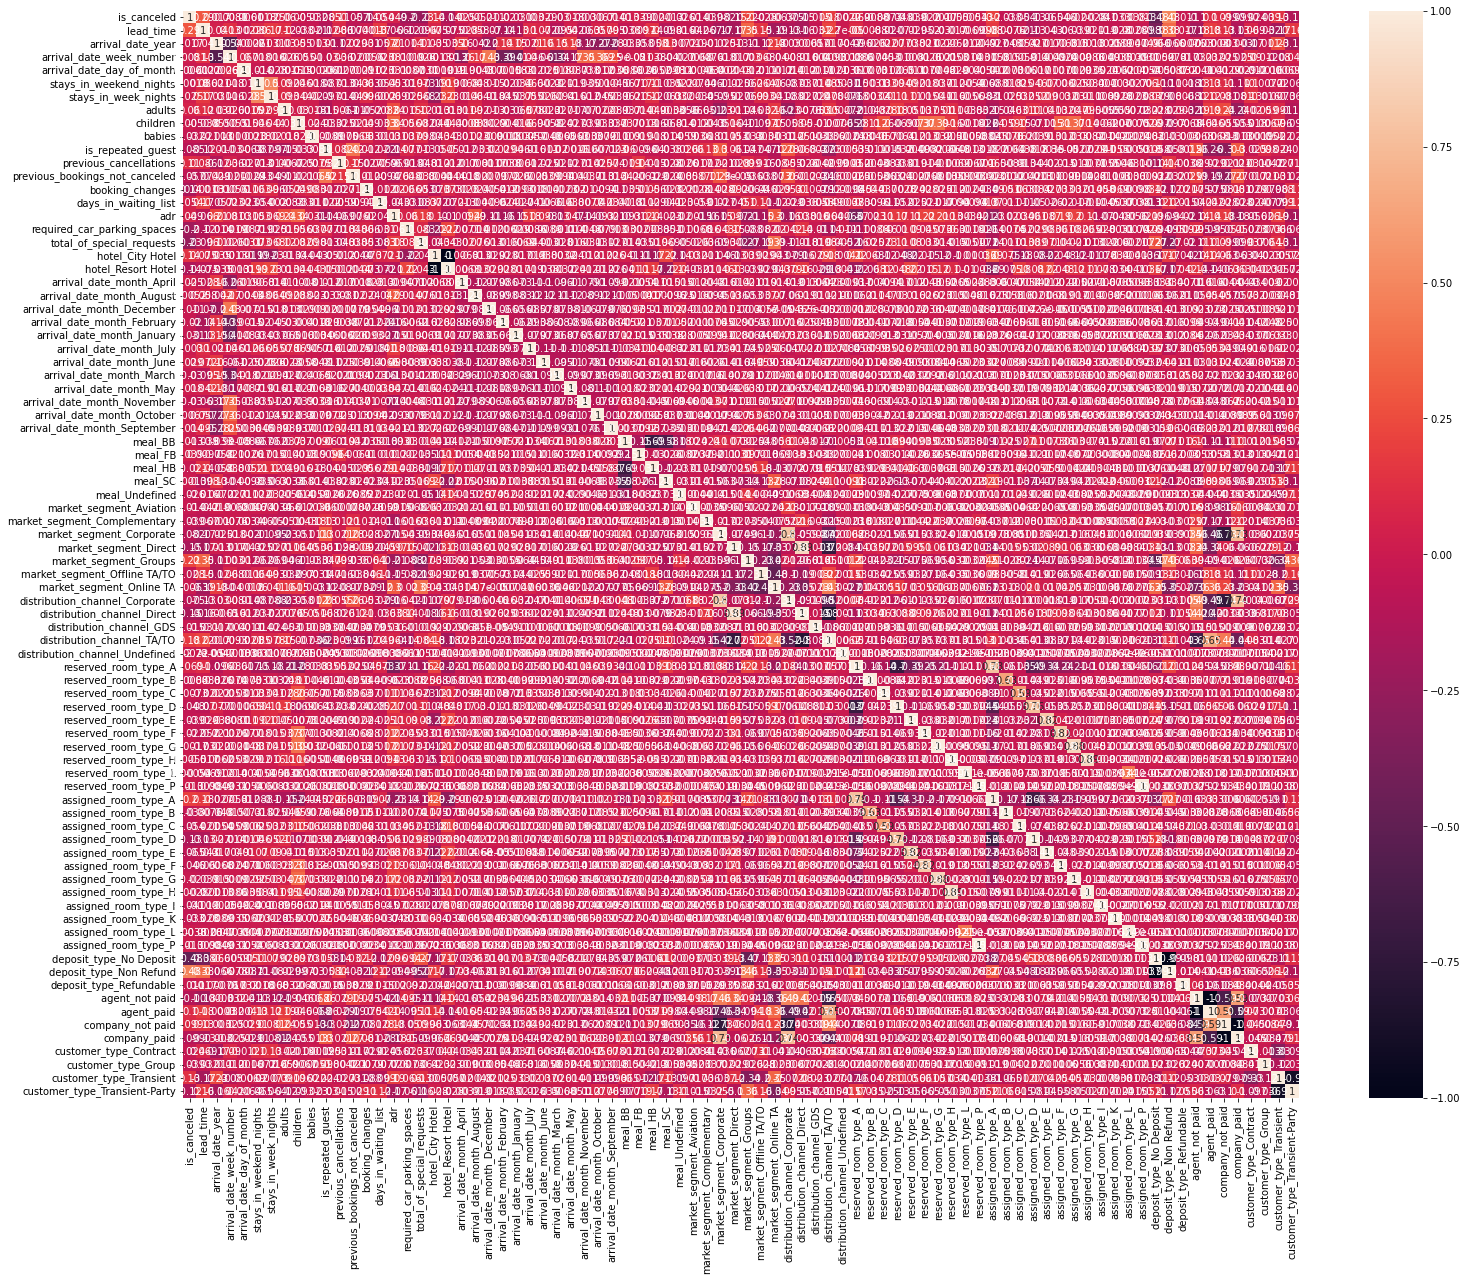

In [25]:
# Se grafica
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(corMat, annot=True,ax=ax)
plt.show()

In [26]:
# Seleccionamos las variables más correlacionadas para ajustar nuestros modelos
df_dummies1 = df_dummies.filter(["lead_time","previous_cancellations","hotel_City Hotel","market_segment_Groups",
                                "assigned_room_type_A","deposit_type_Non Refund","agent_paid","company_not paid",
                                "customer_type_Transient"])

## 3. Ajustar los siguientes modelos y encontrar las métricas de Accuracy, Recall y Precision para cada uno de ellos (se debe predecir la variable “Is_canceled”)

### a. Logistic Regression

#### 1 Variable independiente

Usaremos la variable "deposit_type_Non Refund" dado que fue una de las que tuvo mayor grado de correlación con la variable dependiente "is_canceled" en la matriz de correlación

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Metodo exclusión para este caso
X = df_dummies1["deposit_type_Non Refund"].values.reshape(-1,1)
y = df_dummies["is_canceled"].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [29]:
# Ajustamos el modelo
# Usamos sag como método
model = LogisticRegression(solver='sag')
clf = model.fit(X_train, y_train)

# Predecimos los datos en los datos de test
LR1_pred_labels = model.predict(X_test)

# Imprimimos la pendiente y los coeficientes
print('Intercept (Beta 0): ', clf.intercept_)
print('Slope (Beta 1): ', clf.coef_)

Intercept (Beta 0):  [-0.90198048]
Slope (Beta 1):  [[5.88714957]]


In [30]:
# Revisamos las métricas del modelo
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Checamos el reporte de clasificación
print(classification_report(y_test, LR1_pred_labels))

Accuracy Score:  0.7516019600452318
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     15066
           1       0.99      0.33      0.49      8811

    accuracy                           0.75     23877
   macro avg       0.86      0.66      0.66     23877
weighted avg       0.82      0.75      0.71     23877



#### Multivariado

Se usan 9 de las variables con el mayor grado de correlación con la variable independiente "is_canceled" para ajustar este modelo. 

In [31]:
# Método de la exclusión
X = df_dummies1.values
y = df_dummies["is_canceled"].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [33]:
# Ajustamos el modelo
# Usamos sag como método
model = LogisticRegression(solver='sag')
clf = model.fit(X_train, y_train)

# Predecimos los datos en los datos de test
LR1_pred_labels = model.predict(X_test)

# Imprimimos la pendiente y los coeficientes
print('Intercept (Beta 0): ', clf.intercept_)
print('Slope (Beta 1): ', clf.coef_)

Intercept (Beta 0):  [-1.49603896]
Slope (Beta 1):  [[ 0.00371539  0.61180787  0.14229958  0.30981185  0.23096478  1.97987249
   0.06211234 -0.43738851  0.58835496]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [34]:
# Revisamos las métricas del modelo
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Checamos el reporte de clasificación
print(classification_report(y_test, LR1_pred_labels))

Accuracy Score:  0.7571721740587176
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.97      0.83     15066
           1       0.89      0.39      0.54      8811

    accuracy                           0.76     23877
   macro avg       0.81      0.68      0.69     23877
weighted avg       0.79      0.76      0.73     23877



### b. Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

#### Usando todas las variables

In [69]:
# Método de la exclusión
X = df_dummies.drop("is_canceled",axis=1).values
y = df_dummies["is_canceled"].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=42)

In [71]:
tree = DecisionTreeClassifier(random_state=0)

In [72]:
# Ajustamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [73]:
# Revisamos que tan profundo es el árbol
tree.get_depth()

43

In [74]:
# Training
tree.score(X_train, y_train)

0.9920319976546221

In [75]:
# Revisamos las métricas del modelo
score = tree.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Checamos el reporte de clasificación
print(classification_report(y_test, tree.predict(X_test)))

Accuracy Score:  0.8242660300707794
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     15033
           1       0.76      0.78      0.77      8844

    accuracy                           0.82     23877
   macro avg       0.81      0.81      0.81     23877
weighted avg       0.83      0.82      0.82     23877



In [76]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["canceled","not canceled"],
                feature_names=df_dummies.drop("is_canceled",axis=1).columns, impurity=True,filled=True)

In [49]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [65]:
def plot_feature_importance(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), df_dummies.drop("is_canceled",axis=1).columns)
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Característica")
    plt.ylim(-1,n_features)
    plt.show()

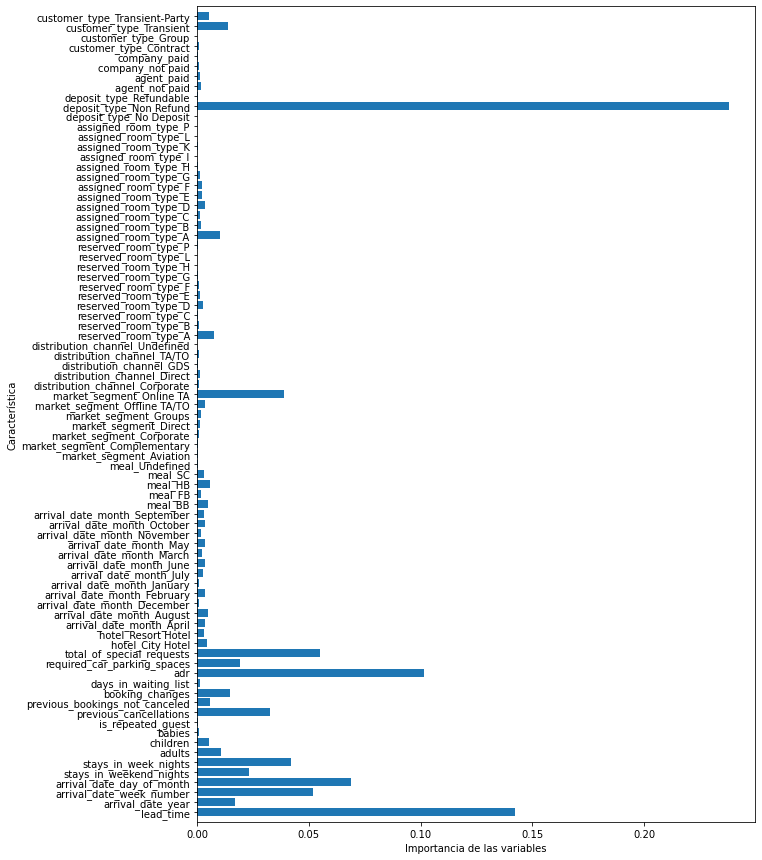

In [78]:
# Se observan las variables más importantes
fig = plt.figure(figsize=(10,15))
plot_feature_importance(tree)

#### Usando las variables seleccionadas

In [79]:
# Método de la exclusión
X = df_dummies1.values
y = df_dummies["is_canceled"].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=42)

In [81]:
tree = DecisionTreeClassifier(random_state=0)

In [82]:
# Ajustamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [83]:
# Revisamos que tan profundo es el árbol
tree.get_depth()

37

In [84]:
# Training
tree.score(X_train, y_train)

0.7956694273718157

In [85]:
# Revisamos las métricas del modelo
score = tree.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Checamos el reporte de clasificación
print(classification_report(y_test, tree.predict(X_test)))

Accuracy Score:  0.7751392553503371
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.94      0.84     15033
           1       0.84      0.49      0.62      8844

    accuracy                           0.78     23877
   macro avg       0.80      0.72      0.73     23877
weighted avg       0.79      0.78      0.76     23877



### c. Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
# Método de la exclusión
X = df_dummies.drop("is_canceled",axis=1).values
y = df_dummies["is_canceled"].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [89]:
# Ajustamos el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [90]:
# Accuracy del training
rf.score(X_train,y_train)

0.9921995246421729

In [91]:
# Revisamos las métricas del modelo
score = rf.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Checamos el reporte de clasificación
print(classification_report(y_test, rf.predict(X_test)))

Accuracy Score:  0.870754282363781
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     15066
           1       0.87      0.77      0.81      8811

    accuracy                           0.87     23877
   macro avg       0.87      0.85      0.86     23877
weighted avg       0.87      0.87      0.87     23877



In [94]:
def plot_feature_importance(df, model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), df_dummies.drop("is_canceled",axis=1).columns)
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Característica")
    plt.ylim(-1,n_features)
    plt.show()

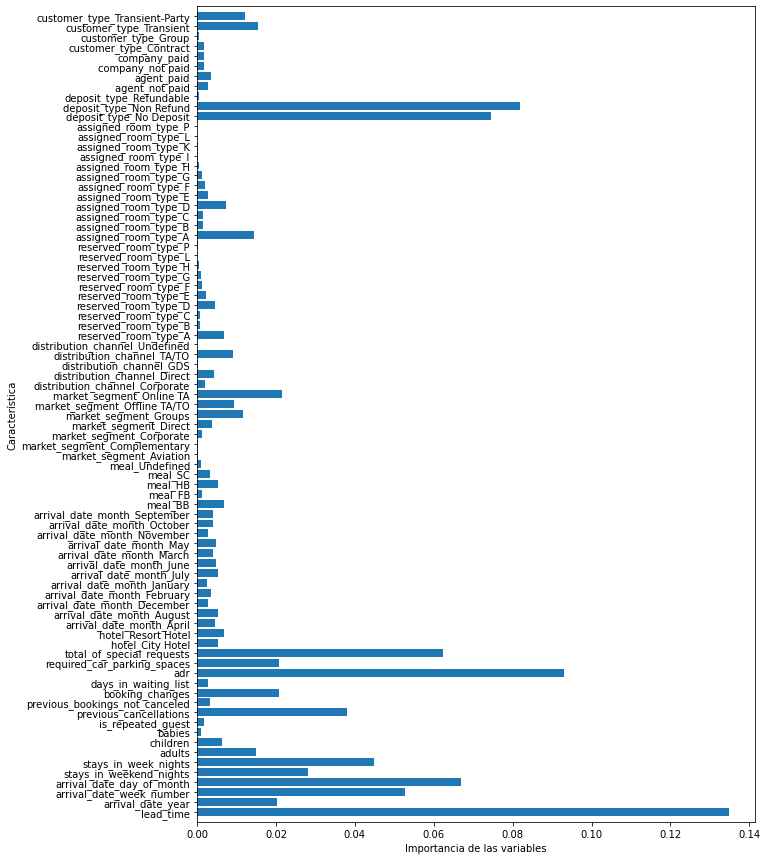

In [95]:
# Graficamos la importancia da las variables
fig = plt.figure(figsize=(10,15))
plot_feature_importance(df_dummies,rf)

### d. Gradient Boosting Tree

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
# Método de la exclusión
X = df_dummies.drop("is_canceled",axis=1).values
y = df_dummies["is_canceled"].values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [99]:
# Ajustamos el modelo con 100 árboles con profundidad de 3
gbt = GradientBoostingClassifier(random_state=0) 
gbt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [100]:
print("Accuracy training: ,", gbt.score(X_train,y_train))

Accuracy training: , 0.820578596333253


In [101]:
# Revisamos las métricas del modelo
score = gbt.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Checamos el reporte de clasificación
print(classification_report(y_test, gbt.predict(X_test)))

Accuracy Score:  0.8201197805419441
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     15066
           1       0.85      0.62      0.72      8811

    accuracy                           0.82     23877
   macro avg       0.83      0.78      0.79     23877
weighted avg       0.82      0.82      0.81     23877



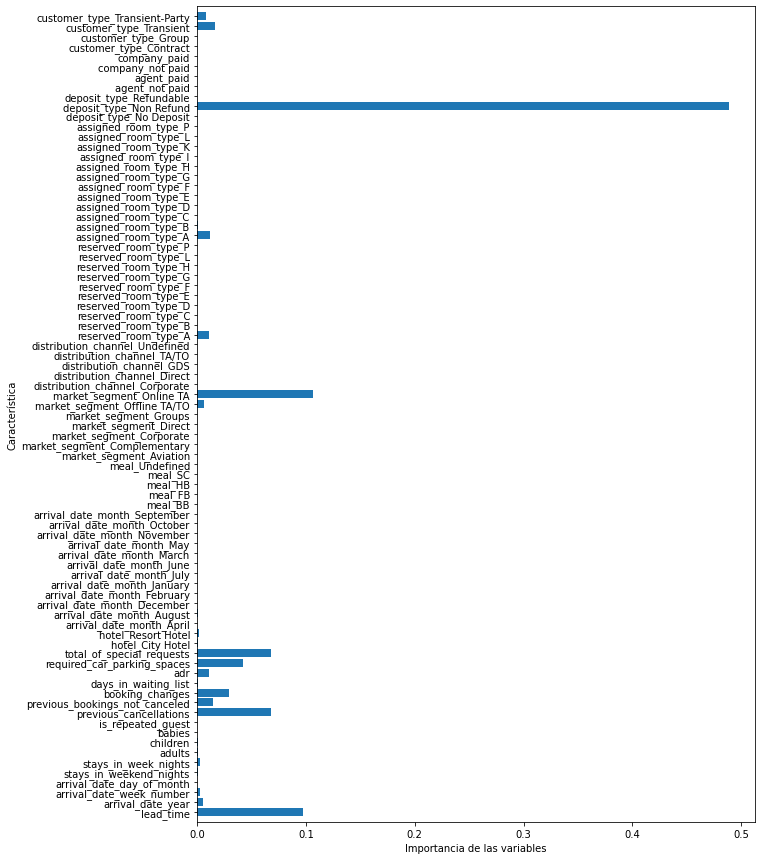

In [102]:
# Graficamos la importancia de las variables
fig = plt.figure(figsize=(10,15))
plot_feature_importance(df_dummies,gbt)

## 4. ¿Cuáles son las mejores variables para la predicción?

Después de ajustar y probar los modelos comprobamos que existen algunas variables que son las mejores para poder predecir, y estas no se alejan mucho de lo que encontramos en la matriz de correlación, principalmente se tienen las siguientes variables cómo las más importantes:
- "lead_time"
- "deposit_type_Non Refund"
- "previous_cancellations"
- "hotel_City Hotel"
- "market_segment_Groups"
- "assigned_room_type_A"
- "customer_type_Transient"
- "adr"
- "total_of_special_requests"

## 5. Discuta, ¿cuál modelo entrega mejor predictibilidad y por qué?

- Tras analizar las métricas entregadas por los 6 modelos que se ajustaron y probaron, se llega a la conclusión de que el modelo "Random Forest" tiene la mejor predictibilidad, ya que su Accuracy fue de 0.87, valor que fue el más alto entre los 6 modelos, en especial nos interesa predecir cuando un cliente va a cancelar o no va a llegar a una reservación, por lo que en el modelo de "Random Forest" se tiene un valor de 0.87 para Precision y 0.77 para Recall, lo que nos predice las observaciones que serán canceladas.
- El segundo mejor modelo fue "Decision Tree" con un valor de Accuracy de 0.82, con Precision de 0.76 y un valor de Recall de 0.78. Junto con éste modelo encontramos a "Gradient Boosting Tree" con un Accuracy de 0.82, un valor de Precision de 0.85 y un valor de Recall de 0.62.
- Cabe mencionar que "Logistic Regression" con una variable independiente, tuvo un desempeño bastante bueno con un Accuracy de 0.75, un valor de Precision de 0.99 y un Recall de 0.33.

## 6. Evaluar el comportamiento (pueden usar gráficos de dispersión) de las tres variables más importantes con respecto a la cancelación

Las 3 variables más importantes son "lead_time","adr" y "deposit_type_Non Refund", graficaremos la interación de las 3 con la variable "is_canceled" 

Graficamos las variables adr y lead time agrupandolas en, si cancelaron o no la reservación

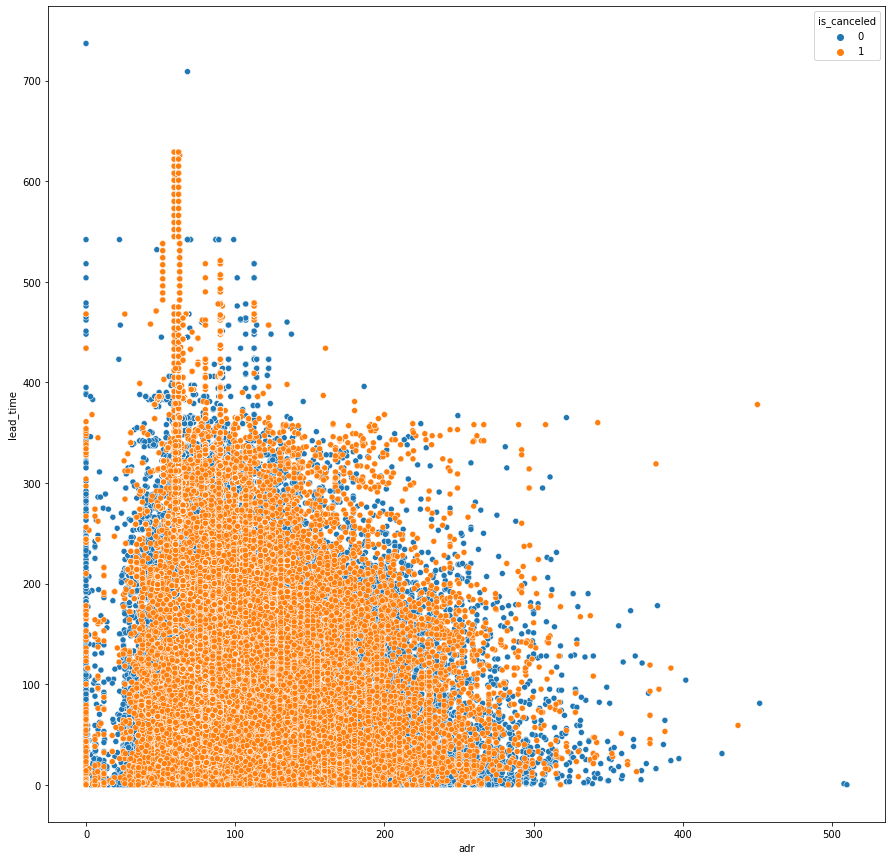

In [139]:
import seaborn as sns
fig = plt.figure(figsize=(15,15))
sns.scatterplot(data=df_dummies, x="adr", y="lead_time", hue="is_canceled")

Después graficamos las mismas variables pero ahora agrupandolas con la variable deposit type Non Refund

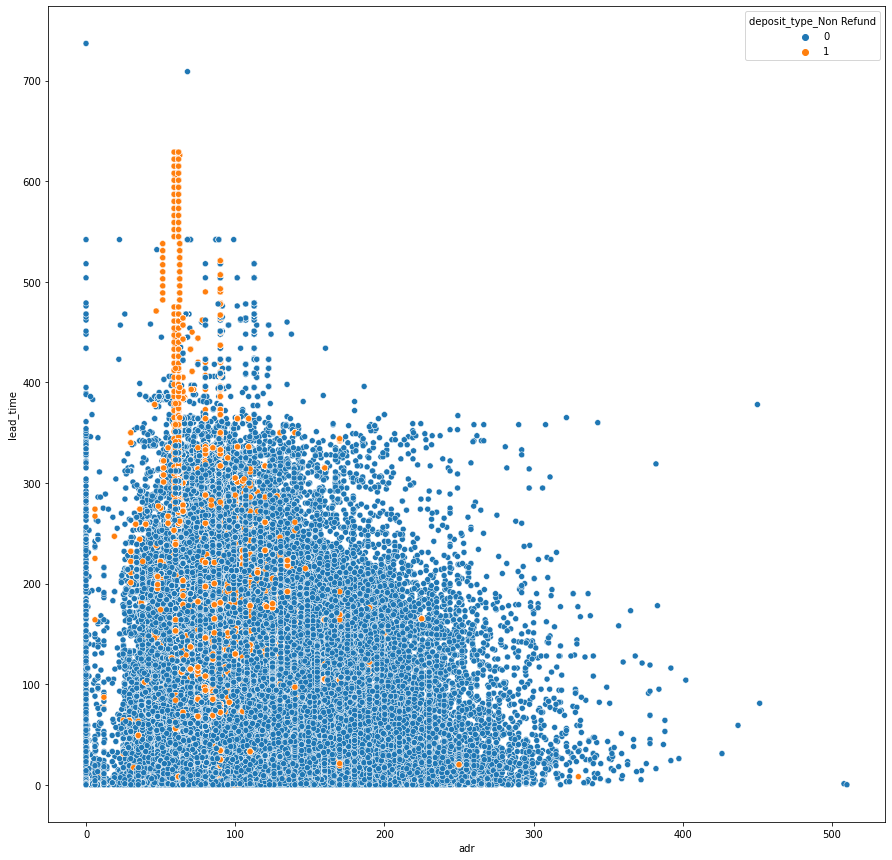

In [140]:
fig = plt.figure(figsize=(15,15))
sns.scatterplot(data=df_dummies, x="adr", y="lead_time", hue="deposit_type_Non Refund")

Se puede observar un patrón algo extraño, sin embargo, aún no sabemos si tiene un significado directo y claro.

Por último, vamos a graficar las 4 variables para tratar de encontrar una respuesta del comportamiento de los datos.

<Figure size 1080x1080 with 0 Axes>

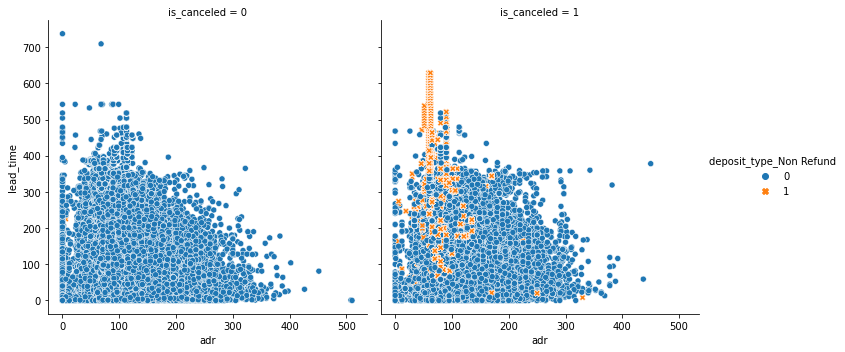

In [138]:
fig = plt.figure(figsize=(15,15))
sns.relplot(
    data=df_dummies, x="adr", y="lead_time",col="is_canceled",
    hue="deposit_type_Non Refund", style="deposit_type_Non Refund",kind="scatter"
)

Al observar el gráfico, podemos tratar de dar una explicación del comportamiento de los datos,sin embargo, no podemos tener la certeza del mismo con exactitud.
El patrón que se puede observar, son registros de clientes los cuales todos cancelaron su reservación y además, el tipo de deposito que efectuaron no es reembolsable, también todos estos clientes que cancelaron la reservación pasan de los 400 días entre la fecha de reservación y la fecha de cancelación o no llegada al hotel, aparte, de que la tarifa de casi todas estas observaciones que fueron canceladas no supera los 90 dólares.
- En conclusión, existe una gran probabilidad de que los clientes que reservan con mucho tiempo de anticipación, pagan una tarifa no muy alta y que realizan depositos no reembolsables, cancelen la reservación o no llegen al hotel sin un previo aviso.
